## <font color='green'>A special thanks to all my mentors for helping me constantly to progress technically</font>
## Jupyter notebook prepared, arranged and executed by <font color='red'>Karthi Balasundaram</font> , <font color='blue'> sentimentally analysing Swahili language using real tweet data from twitter.</font>
## Thanks and credits to <font color='blue'>Masakhane Community </font>for joining hands and providing the Swahili dataset

In [3]:
# # installing natural language toolkit(nltk)
# !pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 2.4 MB/s            
     |████████████████████████████████| 288 kB 2.6 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
# # installing openpyxl (a python library to read/write excel files)
# !pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
#importing other default and necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthibalasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#reading the excel file using pandas library
data = pd.read_csv("/Users/karthibalasundaram/Desktop/Emerging_Technologies/Emerge_TA/Project#4_NLP/swahili-twitter-sentiment-analysis.csv")

In [17]:
#the below line calls last 5 rows from the excel
data.tail()

,Tweets,Labels,Language
2258,Je unamfahamu kijana yeyote ambaye ana tatizo ...,0,Swahili
2259,Af ndio inanoga mzee juma halali damu inaflow ...,0,Swahili
2260,Viingilio vya tamasha kubwa zaidi nchini Unawe...,0,Swahili
2261,Asanteni Asanteni kwa kuungana na mimi sasa t...,1,Swahili
2262,Hakuna maji wangeishijekuziba watu midomo si ...,1,Swahili


In [18]:
#the below line calls first 5 rows from the excel
data.head()

,Tweets,Labels,Language
0,So chuga si tunakutana kesho kwenye Nyamachoma...,0,Swahili
1,Asante sana watu wa Sirari jimbo la Tarime ...,1,Swahili
2,Leo nimepata kitambulisho changu cha taifa ...,1,Swahili
3,Mgema akisifiwa tembo hulitia maji,0,Swahili
4,Ee Mwenyezi Mungu Msamehe na Umrehemu na Umuaf...,1,Swahili


In [19]:
#understanding rows and columns present in the excel
data.shape

(2263, 3)

In [20]:
#retreives basic info about the excel data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    2263 non-null   object
 1   Labels    2263 non-null   int64 
 2   Language  2263 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.2+ KB


In [21]:
#a brief description about the data
data.describe()

,Labels
count,2263.000000
mean,0.196642
std,0.607751
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data.isnull().sum()

Tweets      0
Labels      0
Language    0
dtype: int64

In [23]:
#retreives all the columns
data.columns

Index(['Tweets', 'Labels', 'Language'], dtype='object')

In [24]:
#lists first 5 data(tweets) listed under the column "tweet"
data[["Tweets"]].head()

,Tweets
0,So chuga si tunakutana kesho kwenye Nyamachoma...
1,Asante sana watu wa Sirari jimbo la Tarime ...
2,Leo nimepata kitambulisho changu cha taifa ...
3,Mgema akisifiwa tembo hulitia maji
4,Ee Mwenyezi Mungu Msamehe na Umrehemu na Umuaf...


In [25]:
#lists first 5 data(username) listed under the column "username"
data[["Labels"]].head()

,Labels
0,0
1,1
2,1
3,0
4,1


In [27]:
#lists first 5 data(langauge) listed under the column "language"
data[["Language"]].head()

,Language
0,Swahili
1,Swahili
2,Swahili
3,Swahili
4,Swahili


In [28]:
#displays the tweets posted in corresponding languages
data["Language"].value_counts()

Swahili    2263
Name: Language, dtype: int64

In [29]:
#sorting the languages
pi = data.Labels.value_counts().sort_values()

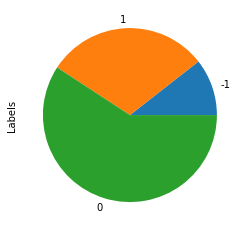

In [30]:
#displaying the sorted lanuages in a pie chart
displ = pi.plot(kind = 'pie')

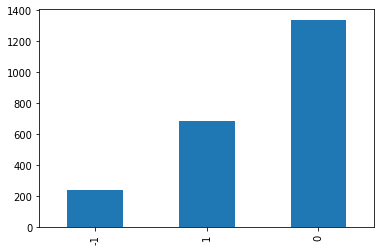

In [31]:
#displaying the sorted lanuages in a bar chart
displ1 = pi.plot(kind = 'bar')

In [32]:
#displays the 369th tweet
data["Tweets"][369]

'Kwanza kufikiria tu kila banker ni teller ni kipimo tosha cha uwezo wa mtu kufikiriso tuwaache'

In [33]:
# defining function for twitter hashtag extraction to classify sentiment analysis
def hashtag_extract(text_list):
    hashtags = []
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)  
    return hashtags

In [34]:
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    b = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    b = b.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=b, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [36]:
hashtags = hashtag_extract(data["Tweets"])
hashtags = sum(hashtags, [])

In [37]:
import seaborn as sns

In [39]:
# generate_hashtag_freqdist(hashtags)

In [41]:
data['total_length_characters'] = data['Tweets'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["Tweets"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0       113
1       121
2        57
3        37
4       264
       ... 
2258     62
2259     53
2260     93
2261     83
2262     86
Name: total_length_characters, Length: 2263, dtype: int64
246291
2263
108.8338488731772


In [42]:
data['total_count_words'] = data['Tweets'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["Tweets"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0       14
1       22
2        8
3        5
4       44
        ..
2258    11
2259     9
2260    14
2261    12
2262    13
Name: total_count_words, Length: 2263, dtype: int64
38005
2263
16.794078656650463


In [43]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Tweets"] = data["Tweets"].apply(clean)

In [44]:
data['total_length_characters'] = data['Tweets'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["Tweets"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0       106
1       117
2        56
3        37
4       256
       ... 
2258     60
2259     53
2260     93
2261     81
2262     86
Name: total_length_characters, Length: 2263, dtype: int64
239110
2263
105.66062748563853


In [45]:
data['total_count_words'] = data['Tweets'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["Tweets"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0       13
1       22
2        8
3        5
4       44
        ..
2258    11
2259     9
2260    14
2261    12
2262    13
Name: total_count_words, Length: 2263, dtype: int64
36861
2263
16.288555015466194


In [68]:
!pip3 install textblob

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 636 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [46]:
from textblob import TextBlob

In [47]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [50]:
data['Sentiment'] = data['Tweets'].apply(lambda x:analyze_sentiment(x))
data['Source'] = 'random_user'
data['Length'] = data['Tweets'].apply(len)
data['Word_counts'] = data['Tweets'].apply(lambda x:len(str(x).split()))

In [57]:
data1=data[['Tweets', 'Sentiment', 'Source',
'Length','Word_counts']]
data1.head()

,Tweets,Sentiment,Source,Length,Word_counts
0,chuga si tunakutana kesho kweny nyamachoma fes...,0,random_user,106,13
1,asant sana watu wa sirari jimbo la tarim vi...,0,random_user,117,22
2,leo nimepata kitambulisho changu cha taifa ...,0,random_user,56,8
3,mgema akisifiwa tembo hulitia maji,0,random_user,37,5
4,ee mwenyezi mungu msameh na umrehemu na umuafu...,0,random_user,256,44


In [59]:
data1['Clean tweet'] = data1['Tweets'].apply(lambda x:clean(x))

In [61]:
data1[["Clean tweet","Sentiment"]].iloc[369]

Clean tweet    kwanza kufikiria tu kila banker ni teller ni k...
Sentiment                                                      0
Name: 369, dtype: object

In [62]:
sentiment = data1['Sentiment'].value_counts()
sentiment

 0    2138
 1      73
-1      52
Name: Sentiment, dtype: int64

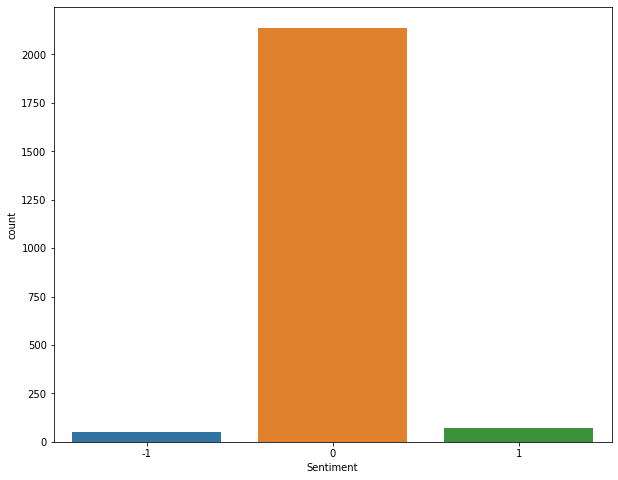

In [63]:
plt.figure(figsize = (10,8))
sns.countplot(data = data1, x = 'Sentiment')
plt.show()

In [78]:
# fig, ax = plt.subplots(figsize = (6, 6))
# sizes = [count for count in data1['Sentiment'].value_counts()]
# labels = list(data['Sentiment'].value_counts().index)
# explode = (0.1, 0, 0)
# # ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'f
# # ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = 9127 tweets)', font
# plt.show()

In [64]:
neutral = data1[data1['Sentiment'] == 0]
positive = data1[data1['Sentiment'] == 1]
negative = data1[data1['Sentiment'] == -1]

In [65]:
negative.iloc[1]

Tweets            tulikuwa kama  lakini mpaka leo hii tumebak...
Sentiment                                                     -1
Source                                               random_user
Length                                                       118
Word_counts                                                   17
Clean tweet       tulikuwa kama  lakini mpaka leo hii tumebak...
Name: 69, dtype: object

In [67]:
#neutral_text
print("Neutral tweet example :",neutral['Tweets'].values[15])
# Positive tweet
print("Positive Tweet example :",positive['Tweets'].values[37])
#negative_text
print("Negative Tweet example :",negative['Tweets'].values[1])

Neutral tweet example : uhuru  jumatano  juni   ukw daima linapatikana mtaani kwako sasa kwa bei ile ile ya tsh  tu wahi nakala yako 
Positive Tweet example :    jana ni mara yangu ya mwisho kumpa barca straight win ijumaa leo natembea hivi game  odd  stake  nimech
Negative Tweet example :    tulikuwa kama  lakini mpaka leo hii tumebakia watu wawili tu elimu yangu ilinikomboa pale nilipoweza kuandika propo


In [68]:
from wordcloud import WordCloud

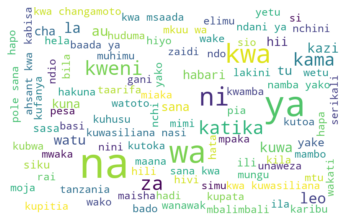

In [69]:
txt = ' '.join(text for text in data1['Clean tweet'])
wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

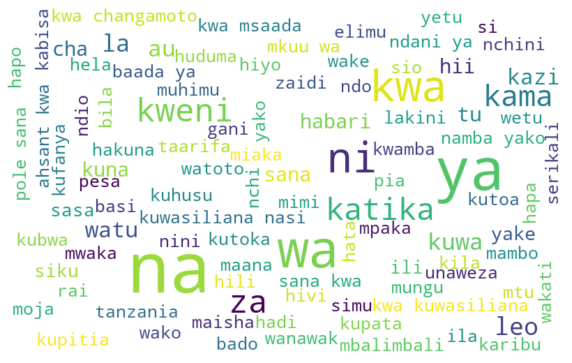

In [70]:
positive_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

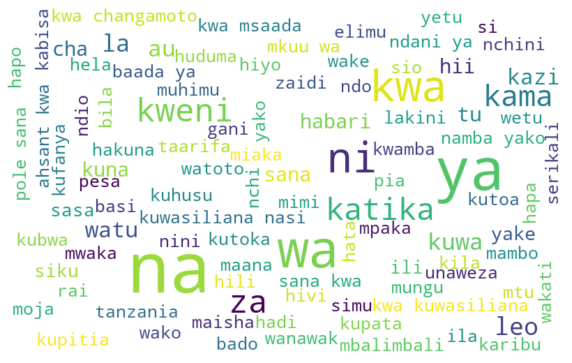

In [71]:
negative_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

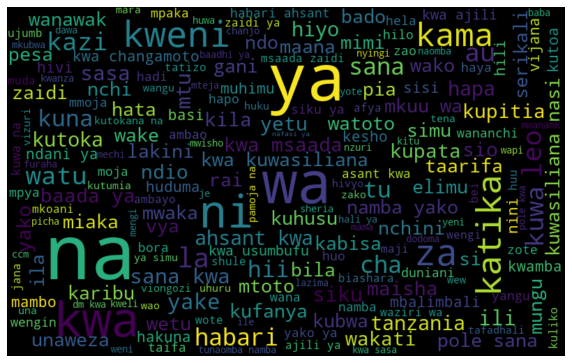

In [72]:
neutral_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Thank you for your time going through.
## <font color= 'red'>Dataset may be shared upon request.</font>